# This notebook goes over the merging of meta-data and features

We associate the extracted CNN features (explanitory vars) with the growth indicators (response var)

In [28]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("darkgrid")

# Files and directories

In [90]:
meta_data_file = '/data/meron/kenya_data/meron_meta_processed.csv'
features_dir = '/data/meron/smart_features_resnet'
hist_fig = '/data/meron/figs/wfh_dist_smart.jpg'
mclass_fig = '/data/meron/figs/malcls_dist_smart.jpg'

In [9]:
meta_data = pd.read_csv(meta_data_file)

features = pd.DataFrame()
for f in os.listdir(features_dir):
    df = pd.read_csv(os.path.join(features_dir, f))
    features = pd.concat([features, df], axis=0)
    print(f + ' loaded')

features_3.csv loaded
features_2.csv loaded
features_1.csv loaded
features_0.csv loaded


In [10]:
print('size of meta data for smart dataset: {}'.format(meta_data.shape))
print('size of encoder features for smart dataset: {}'.format(features.shape))

size of meta data for smart dataset: (4422, 17)
size of encoder features for smart dataset: (3843, 2049)


size of the merged dataset: (3594, 2055)


/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


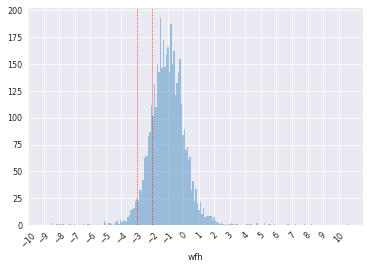

In [40]:
## We only want the photo id, Gender, age, and mam hot-encoder columns, drop duplicate (duplicate samples info were the same)
select_cols=['photo_id','gender_male', 'age_months','maln_mam','maln_normal','maln_sam', 'wfh', 'maln_class']
merged_df=pd.merge(features, meta_data[select_cols], on="photo_id").drop_duplicates('photo_id', keep='first')
print('size of the merged dataset: {}'.format(merged_df.shape))
# merged_df.head()
splot = sns.distplot(meta_data['wfh'], bins=200, kde=False)  # kde_kws={'linewidth':1.0})
plt.xticks(np.arange(-10,11), rotation=45)
splot.axvline(x=-2.0, color='r', linestyle='--', linewidth=0.5)
splot.axvline(x=-3.0, color='r', linestyle='--', linewidth=0.5)
plt.savefig(hist_fig, dpi=400)

In [96]:
meta_data['maln_class'].value_counts()

normal    3689
mam        587
sam        146
Name: maln_class, dtype: int64

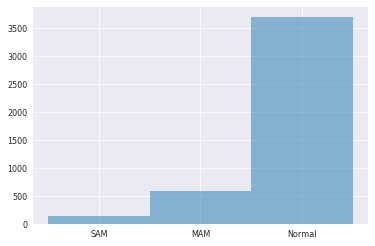

In [91]:
# mln_plot = sns.distplot(meta_data['maln_class'], bins=3, kde=False)  # kde_kws={'linewidth':1.0})
meta_data['maln_class_code'] = 0
meta_data.loc[meta_data['maln_class'] == 'normal', 'maln_class_code'] = 2
meta_data.loc[meta_data['maln_class'] == 'mam', 'maln_class_code'] = 1
plt.hist(meta_data['maln_class_code'], bins=[0, 1, 2, 3], align='left', alpha=0.5)
plt.xticks([0, 1, 2], ['SAM', 'MAM', 'Normal'])
plt.savefig(mclass_fig, dpi=400)

In [13]:
merged_df.to_csv('/data/meron/kenya_data/meron_merged_df.csv', index=False)

In [39]:
missing_data=smart_encoder_feats[(~smart_encoder_feats['photo_id'].isin(merged_df['photo_id']))].drop_duplicates('photo_id', keep='first')

In [41]:
missing_data['photo_id'].to_csv('/data/meron/kenya_data/missing_photo_id.csv', index=False)